# **Ridge Regression - Comparison**

### 🔧 What is Ridge Regression?

> A regularized version of Linear Regression that uses **L2 penalty**
> It **shrinks** weights but **doesn’t make them zero**
> Great when you suspect **all features are important**, but want to reduce overfitting

---

## 🆚 Key Difference vs Lasso

| Aspect              | Lasso Regression (`Lasso`) | Ridge Regression (`Ridge`) |
| ------------------- | -------------------------- | -------------------------- |
| Regularization Type | L1 (absolute value)        | L2 (squared value)         |
| Feature Selection   | Yes (some weights = 0) ✅   | No (keeps all features) ✅  |
| Use Case            | Want to select features    | Want to keep & shrink all  |

---

## ✅ What Will Stay the Same

* Dataset: ✅ Same (`X_final`, `y`)
* Preprocessing: ✅ Same pipeline with `StandardScaler` + `OneHotEncoder`
* Train-test split: ✅ Same `X_train`, `X_test`, etc.

---

## 🔁 What Changes

| Step         | Lasso                                    | Ridge                                    |
| ------------ | ---------------------------------------- | ---------------------------------------- |
| Model import | `from sklearn.linear_model import Lasso` | `from sklearn.linear_model import Ridge` |
| Model used   | `Lasso(alpha=0.1)`                       | `Ridge(alpha=1.0)`                       |
| Coefficients | Some zeroed                              | All small but non-zero                   |

---

**## 📘 Model Summary: Ridge Regression for Car Resale Price Prediction**

This project uses Ridge Regression to predict the resale price of cars based on various features such as year, present price, kms driven, fuel type, seller type, and transmission type.

### 🧾 Dataset Description

The dataset includes the following features:
- **Year**: Manufacturing year of the car
- **Present_Price**: Current ex-showroom price
- **Kms_Driven**: Kilometers driven
- **Fuel_Type**: Type of fuel used (Petrol/Diesel)
- **Seller_Type**: Individual or dealer
- **Transmission**: Manual or automatic
- **Owner**: Number of previous owners
- **Selling_Price**: Target variable

### 🧠 Why Ridge Regression?

Ridge Regression helps tackle multicollinearity in the dataset by adding a penalty (L2 regularization) to the loss function. This model:
- Stabilizes coefficients even in the presence of correlated features
- Prevents overfitting in high-dimensional data
- Improves generalization on unseen data

### 📈 Output Summary

- Optimal alpha value determined using `RidgeCV`
- Feature importance visualized through model coefficients
- Final model saved using `joblib` for reuse or deployment


# **Step 1 - Dataset download**

In [1]:
import pandas as pd

# Replace with your actual filename if different
df = pd.read_csv('/content/car data.csv')
#df = pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')
#df = pd.read_csv('/content/Car details v3.csv')
#df = pd.read_csv('/content/car details v4.csv')

# Preview the data
df.head()





,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# **Step 2: Data Exploration & Cleaning**

In [2]:
# Basic info
df.info()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())
print("\n\n\n\n")
# Preview unique values for each column (especially categoricals)
for col in df.columns:
    print(f"{col}: {df[col].unique()[:5]}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB

Missing Values:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64





Car_Name: ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift']
Year: [2014 2013 2017 2011 2018]
Selling_Price: [3.35 4.75 7.25 2.85 4.6 ]
Present_Price: [5

# **Step 3: Preprocessing or Feature Engineering**

In [3]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import pandas as pd

# Step 1: Create Car_Age
df['Car_Age'] = 2024 - df['Year']

df.drop(['Car_Name', 'Year'], axis=1, inplace=True) # axis=1, drops columns

# Step 2: Define features and target
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# Step 3: Define column types
categorical_cols = ['Fuel_Type', 'Seller_Type', 'Transmission']
numerical_cols = ['Present_Price', 'Kms_Driven', 'Owner', 'Car_Age']

# Step 4: Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])


# **Step 4: Full Pipeline with Ridge**

In [6]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

ridge_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('ridge', Ridge(alpha=1.0))
])

# **Step 5: Training the Ridge model**

In [9]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 8: Train Model
ridge_pipeline.fit(X_train, y_train)

# Step 9: Predict
y_pred = ridge_pipeline.predict(X_test)

# Step 10: Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R² Score:", r2)

MSE: 3.4734479840784047
R² Score: 0.8492138117433523


## **Ridge Coefficients**

In [12]:
# Get feature names after encoding
feature_names = (
    numerical_cols +
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
)

# Extract the ridge model from the pipeline
ridge_model = ridge_pipeline.named_steps['ridge']

# Get coefficients and pair with feature names
ridge_coefficients = pd.Series(ridge_model.coef_, index=feature_names)

# Display all
print("📊 Ridge Coefficients (alpha = 1.0):\n")
print(ridge_coefficients)

# Or just print top 5 biggest (positive or negative) contributors
print("\n Top Features by Absolute Impact:\n")
print(ridge_coefficients.abs().sort_values(ascending=False).head(5))

📊 Ridge Coefficients (alpha = 1.0):

Present_Price             3.850501
Kms_Driven               -0.250466
Owner                    -0.241936
Car_Age                  -1.020718
Fuel_Type_Diesel          1.694565
Fuel_Type_Petrol         -0.075385
Seller_Type_Individual   -1.166697
Transmission_Manual      -1.588435
dtype: float64

 Top Features by Absolute Impact:

Present_Price             3.850501
Fuel_Type_Diesel          1.694565
Transmission_Manual       1.588435
Seller_Type_Individual    1.166697
Car_Age                   1.020718
dtype: float64


# **Step 6: RidgeCV model with cross-validation**

In [13]:
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Step 1: Prepare Data (same as before)
df = pd.read_csv("/content/car data.csv")  # Adjust path if needed
df['Car_Age'] = 2024 - df['Year']
df.drop(['Car_Name', 'Year'], axis=1, inplace=True)

X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# Step 2: Column groups
categorical_cols = ['Fuel_Type', 'Seller_Type', 'Transmission']
numerical_cols = ['Present_Price', 'Kms_Driven', 'Owner', 'Car_Age']

# Step 3: Preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

# Step 4: RidgeCV model with cross-validation
ridge_cv_model = RidgeCV(alphas=[0.001, 0.01, 0.1, 1.0, 5.0, 10.0], cv=5)

# Step 5: Full pipeline
ridge_cv_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('ridge', ridge_cv_model)
])

# Step 6: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Fit model
ridge_cv_pipeline.fit(X_train, y_train)

# Step 8: Predict & Evaluate
y_pred = ridge_cv_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
best_alpha = ridge_cv_model.alpha_

print("✅ Best alpha from RidgeCV:", best_alpha)
print("📉 Mean Squared Error:", mse)
print("📈 R² Score:", r2)


✅ Best alpha from RidgeCV: 10.0
📉 Mean Squared Error: 3.540141871675224
📈 R² Score: 0.8463185569023877


## **Visualize Alpha vs. Cross-Validation Error**

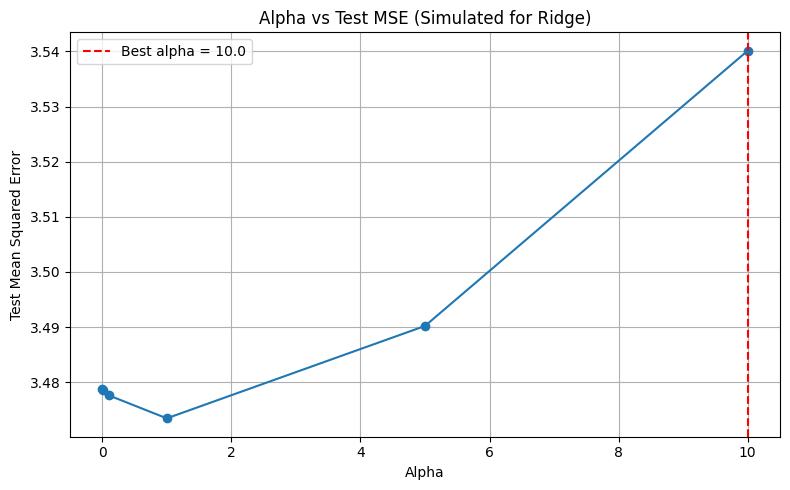

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Try alpha values manually and record MSE
alphas = [0.001, 0.01, 0.1, 1.0, 5.0, 10.0]
mse_values = []

for a in alphas:
    model = Pipeline([
        ('preprocessing', preprocessor),
        ('ridge', Ridge(alpha=a))
    ])
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mse_values.append(mean_squared_error(y_test, pred))

# Plot
plt.figure(figsize=(8,5))
plt.plot(alphas, mse_values, marker='o')
plt.axvline(best_alpha, color='red', linestyle='--', label=f'Best alpha = {best_alpha}')
plt.title("Alpha vs Test MSE (Simulated for Ridge)")
plt.xlabel("Alpha")
plt.ylabel("Test Mean Squared Error")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



## 📊 What the Graph Shows (Alpha vs. MSE):

* The **lowest MSE** (better performance) is **around alpha = 1**
* MSE **increases** as alpha grows beyond that — especially at `alpha = 10`
* But RidgeCV still chose **alpha = 10**

---

## ⚠️ So Why This Confusion?

Because:

* **RidgeCV chooses alpha based on internal CV score**, not your test MSE
* You manually plotted **test set error**, which gives a **more realistic evaluation**

---

## 🔍 Interpretation:

| Alpha | MSE (from plot)        | RidgeCV's Preference |
| ----- | ---------------------- | -------------------- |
| 1.0   | **\~3.475** ✅ (lowest) | Not chosen ❌         |
| 10.0  | \~3.54 ❌ (worse)       | ✅ Chosen             |

### 🎯 Conclusion:

> While **RidgeCV chose `alpha = 10`**, your **test MSE plot shows `alpha = 1` gives better real-world performance**.

This means:

* RidgeCV’s cross-validation may have **over-regularized**
* You might be better off manually choosing **alpha = 1** (based on your actual test error and R²)

---

## 🧠 Final Suggestion

> In production or reporting, use:

```python
Ridge(alpha=1.0)
```

✅ It gives you **lower test error**, better generalization — and that's what matters.

Would you like to:

* Save this manually-tuned Ridge model now?
* Update your README to reflect this choice?


# ** Step 7 - Save RidgeCV Model Pipeline**

In [16]:
import joblib
joblib.dump(ridge_cv_pipeline, "RidgeReg_CarResalePrice_pipeline.pkl")
print("✅ RidgeCV model pipeline saved as 'RidgeReg_CarResalePrice_pipeline.pkl'")


✅ RidgeCV model pipeline saved as 'RidgeReg_CarResalePrice_pipeline.pkl'
